In [21]:
# 패키지 로딩하기
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [16]:
# 그래프의 한글 깨짐 방지
plt.rcParams["font.family"] = "Malgun Gothic"

In [3]:
# 엑셀 파일 경로를 지정합니다.
file_path = 'd:/NCRC/10대 청소년의 정신건강 실태조사.xlsx'

# pandas의 read_excel 함수를 사용하여 엑셀 파일을 읽어옵니다.
survey = pd.read_excel(file_path)
survey.head()

PID  TYPE  SCH_ID  SEX  DQ1M1  DQ1M2  DQ1M3  DQ1M4  DQ1M5  DQ1M6  ...  \
0  9003     2    9739    2      3    NaN    NaN    NaN    NaN    NaN  ...   
1  9018     2    9783    2      4    NaN    NaN    NaN    NaN    NaN  ...   
2  9019     2    9793    2      2    3.0    4.0    NaN    NaN    NaN  ...   
3  9060     2    9725    1      3    4.0    NaN    NaN    NaN    NaN  ...   
4  9066     2    9727    1      1    2.0    4.0    NaN    NaN    NaN  ...   

   Q36_2M3  Q36_2M4 Q36_2M5  Q36_2M6 Q36_2M7  WT_A  WT_B  CLASS1  CLASS2  AREA  
0      NaN      NaN     NaN      NaN     NaN   1.0   1.0     NaN     2.0     4  
1      NaN      NaN     NaN      NaN     NaN   1.0   1.0     NaN     2.0     2  
2      NaN      NaN     NaN      NaN     NaN   1.0   1.0     NaN     2.0     2  
3      NaN      NaN     NaN      NaN     NaN   1.0   1.0     NaN     2.0     1  
4      NaN      NaN     NaN      NaN     NaN   1.0   1.0     NaN     2.0     4  

[5 rows x 313 columns]

In [4]:
# 데이터의 정보 보기
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6689 entries, 0 to 6688
Columns: 313 entries, PID to AREA
dtypes: float64(61), int64(250), object(2)
memory usage: 16.0+ MB


In [8]:
# 결측치의 현황
missing_values = survey.isnull().sum()
missing_values

PID          0
TYPE         0
SCH_ID       0
SEX          0
DQ1M1        0
          ... 
WT_A         0
WT_B         0
CLASS1     752
CLASS2    5937
AREA         0
Length: 313, dtype: int64

In [10]:
# 결측치 현황을 엑셀로 저장하기
missing_values.to_excel("d:/NCRC/missing.xlsx", index = True)

In [11]:
# 데이터의 가공
residence_mapping = {1: "가족과 함께 살고 있다", 
                     2: "기숙사/하숙/자취", 
                     3: "기타"}
survey['거주형태'] = survey['DQ2'].map(residence_mapping)
survey.head()

PID  TYPE  SCH_ID  SEX  DQ1M1  DQ1M2  DQ1M3  DQ1M4  DQ1M5  DQ1M6  ...  \
0  9003     2    9739    2      3    NaN    NaN    NaN    NaN    NaN  ...   
1  9018     2    9783    2      4    NaN    NaN    NaN    NaN    NaN  ...   
2  9019     2    9793    2      2    3.0    4.0    NaN    NaN    NaN  ...   
3  9060     2    9725    1      3    4.0    NaN    NaN    NaN    NaN  ...   
4  9066     2    9727    1      1    2.0    4.0    NaN    NaN    NaN  ...   

   Q36_2M4  Q36_2M5 Q36_2M6  Q36_2M7 WT_A  WT_B  CLASS1  CLASS2  AREA  \
0      NaN      NaN     NaN      NaN  1.0   1.0     NaN     2.0     4   
1      NaN      NaN     NaN      NaN  1.0   1.0     NaN     2.0     2   
2      NaN      NaN     NaN      NaN  1.0   1.0     NaN     2.0     2   
3      NaN      NaN     NaN      NaN  1.0   1.0     NaN     2.0     1   
4      NaN      NaN     NaN      NaN  1.0   1.0     NaN     2.0     4   

           거주형태  
0  가족과 함께 살고 있다  
1  가족과 함께 살고 있다  
2  가족과 함께 살고 있다  
3  가족과 함께 살고 있다  
4  가족과 함께 살고 있다  

[5 rows x 314 columns]

In [12]:
# 빈도(Frequency) 구하기
residence_counts = survey['거주형태'].value_counts()
residence_counts

거주형태
가족과 함께 살고 있다    6423
기숙사/하숙/자취        194
기타                72
Name: count, dtype: int64

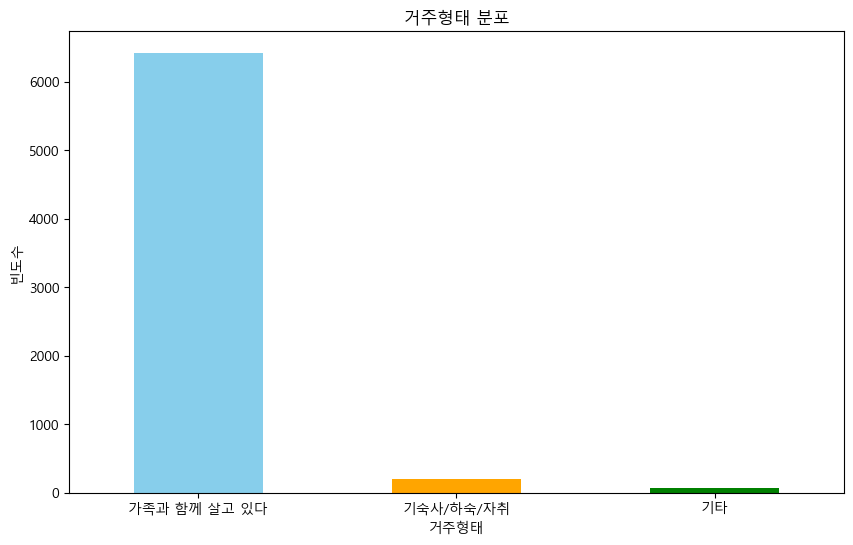

In [17]:
# 막대그래프를 그립니다.
plt.figure(figsize = (10, 6))
residence_counts.plot(kind  = 'bar', 
                      color =['skyblue', 'orange', 'green'])
plt.title('거주형태 분포')
plt.xlabel('거주형태')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.show()

In [18]:
# 데이터 가공
# 'Q15A'로 시작하는 열들을 선택합니다.
q15a_columns = [col for col in survey.columns if col.startswith('Q15A')]

# 선택한 열들의 평균을 계산하여 새로운 열 'Q15A'에 저장합니다.
survey['Q15A'] = survey[q15a_columns].mean(axis = 1)
survey.head()

PID  TYPE  SCH_ID  SEX  DQ1M1  DQ1M2  DQ1M3  DQ1M4  DQ1M5  DQ1M6  ...  \
0  9003     2    9739    2      3    NaN    NaN    NaN    NaN    NaN  ...   
1  9018     2    9783    2      4    NaN    NaN    NaN    NaN    NaN  ...   
2  9019     2    9793    2      2    3.0    4.0    NaN    NaN    NaN  ...   
3  9060     2    9725    1      3    4.0    NaN    NaN    NaN    NaN  ...   
4  9066     2    9727    1      1    2.0    4.0    NaN    NaN    NaN  ...   

   Q36_2M5  Q36_2M6 Q36_2M7  WT_A WT_B  CLASS1  CLASS2  AREA          거주형태  \
0      NaN      NaN     NaN   1.0  1.0     NaN     2.0     4  가족과 함께 살고 있다   
1      NaN      NaN     NaN   1.0  1.0     NaN     2.0     2  가족과 함께 살고 있다   
2      NaN      NaN     NaN   1.0  1.0     NaN     2.0     2  가족과 함께 살고 있다   
3      NaN      NaN     NaN   1.0  1.0     NaN     2.0     1  가족과 함께 살고 있다   
4      NaN      NaN     NaN   1.0  1.0     NaN     2.0     4  가족과 함께 살고 있다   

      Q15A  
0  2.12500  
1  2.53125  
2  2.12500  
3  2.40625  
4  2.34375  

[5 rows x 315 columns]

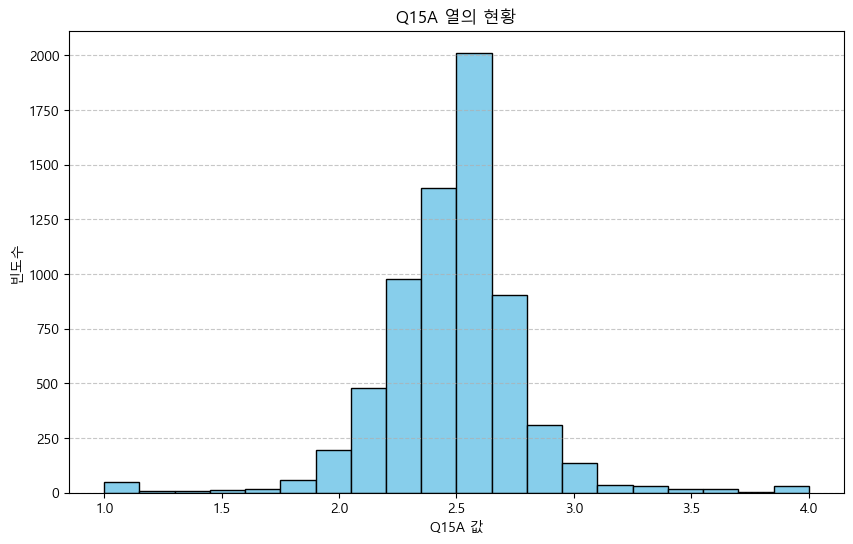

In [19]:
# Q15A의 히스토그램
# 'Q15A' 열의 현황을 히스토그램으로 시각화합니다.
plt.figure(figsize = (10, 6))
plt.hist(survey['Q15A'].dropna(), 
         bins      = 20, 
         color     = 'skyblue', 
         edgecolor = 'black')
plt.title('Q15A 열의 현황')
plt.xlabel('Q15A 값')
plt.ylabel('빈도수')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

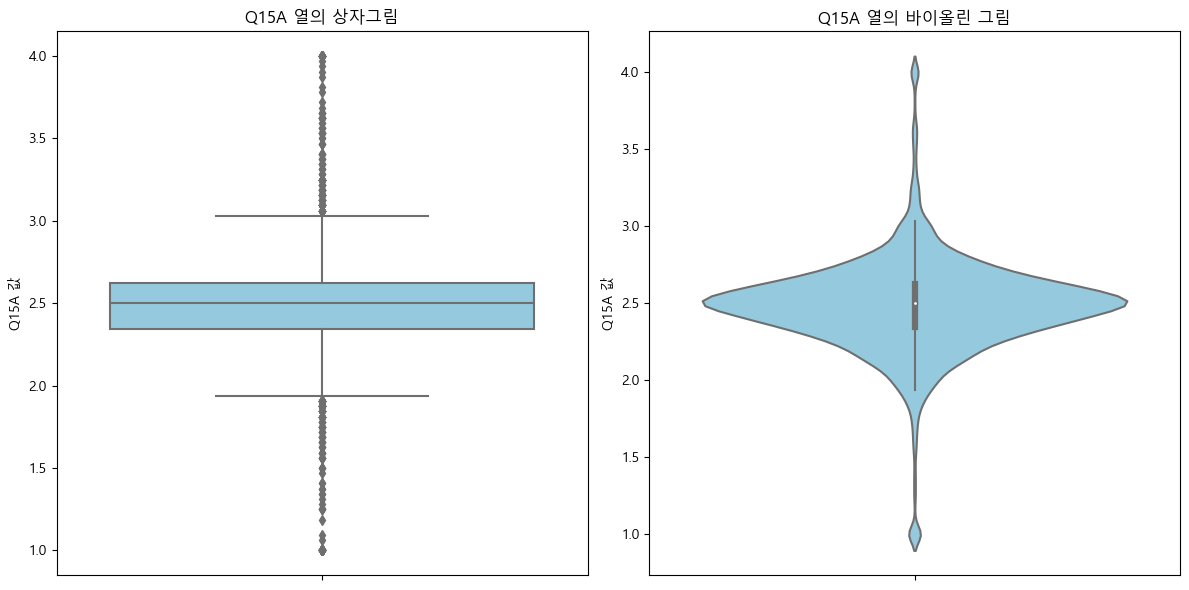

In [22]:
# 상자그림, 바이올린

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y = survey["Q15A"], color = 'skyblue')
plt.title('Q15A 열의 상자그림')
plt.ylabel('Q15A 값')

# 바이올린 그림을 그립니다.
plt.subplot(1, 2, 2)
sns.violinplot(y = survey["Q15A"], color='skyblue')
plt.title('Q15A 열의 바이올린 그림')
plt.ylabel('Q15A 값')

plt.tight_layout()
plt.show()

In [23]:
# Q15A의 기술통계량
survey['Q15A'].describe()

count    6689.000000
mean        2.480163
std         0.305580
min         1.000000
25%         2.343750
50%         2.500000
75%         2.625000
max         4.000000
Name: Q15A, dtype: float64

In [24]:
# 성별에 따른 Q15A의 기술통계량
survey.groupby('SEX')['Q15A'].describe()

count      mean       std  min      25%  50%    75%  max
SEX                                                           
1    3104.0  2.484909  0.353686  1.0  2.34375  2.5  2.625  4.0
2    3585.0  2.476055  0.256729  1.0  2.34375  2.5  2.625  4.0